#  K-means
#### 이상치 탐지(Anomaly Detection), 특성변수(Data Representation for Input to other Algorithms), 차원축소(Dimensionality Reduction)
https://medium.com/analytics-vidhya/less-known-applications-of-k-means-clustering-dimensionality-reduction-anomaly-detection-and-908f4bee155f

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster
sns.set(style = 'white', font_scale = 1.4)

# <font color='brown'> A. Anomaly Detection using K-Means

### 1. 데이터확보(훈련과 검증데이터 분리)

In [3]:
data = pd.DataFrame(datasets.load_boston().data, columns = datasets.load_boston().feature_names)
y = datasets.load_boston().target
features = ['CRIM', 'LSTAT', 'RM', 'AGE', 'INDUS', 'NOX', 'DIS']
data = data[features]
data.head()

,CRIM,LSTAT,RM,AGE,INDUS,NOX,DIS
0,0.00632,4.98,6.575,65.2,2.31,0.538,4.0900
1,0.02731,9.14,6.421,78.9,7.07,0.469,4.9671
2,0.02729,4.03,7.185,61.1,7.07,0.469,4.9671
3,0.03237,2.94,6.998,45.8,2.18,0.458,6.0622
4,0.06905,5.33,7.147,54.2,2.18,0.458,6.0622


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)

### 2. 자료표준화와 Kmeans(2개 군집) pipeline 구성

In [5]:
kmeans = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 2)).fit(X_train)

### 3. 각 군집과의 거리 생성(Store transformed dimensions)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Comp 1', ylabel='Comp 2'>

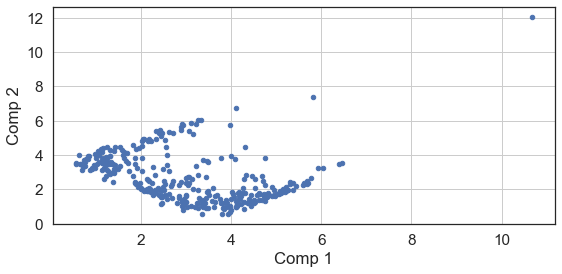

In [6]:
data = pd.DataFrame(kmeans.transform(X_train), columns = ['Comp 1', 'Comp 2'])

data.plot.scatter( x='Comp 1', y= 'Comp 2', grid = True, figsize = (9, 4))

### 4. 각 군집과 개별 인스턴스의 거리 생성 (이상치 수치)
- 각 군집과의 거리가 클수록 각 군집에서 outlier로 간주
- Calculate the Anomaly score - as the minimum distance of a point to any cluster center

In [7]:
data['anomaly_score'] = data.min(axis = 1)
data['cluster'] = kmeans.predict(X_train)
data

,Comp 1,Comp 2,anomaly_score,cluster
0,0.646452,3.463967,0.646452,0
1,2.427665,1.979924,1.979924,1
2,2.842715,2.279889,2.279889,1
3,1.869138,3.846540,1.869138,0
4,2.371637,2.085724,2.085724,1
...,...,...,...,...
334,2.136590,2.596346,2.136590,0
335,3.366802,1.254779,1.254779,1
336,5.221758,1.970826,1.970826,1
337,1.402097,4.232485,1.402097,0


- 2개 그릅에서 가장 거리가 먼(이상치 수치가 높은) 인스턴스별로 자료 정리

In [8]:
data.sort_values('anomaly_score', ascending = False).head()
data[data['cluster'] == 1].sort_values('anomaly_score', ascending = False).head()

,Comp 1,Comp 2,anomaly_score,cluster
123,10.674418,12.061456,10.674418,0
111,5.813679,7.394600,5.813679,0
70,4.315533,4.479416,4.315533,0
154,4.102307,6.718466,4.102307,0
267,3.965874,5.775904,3.965874,0


,Comp 1,Comp 2,anomaly_score,cluster
40,3.998740,3.946522,3.946522,1
316,4.744754,3.851875,3.851875,1
327,4.092382,3.773705,3.773705,1
103,6.449190,3.566397,3.566397,1
46,6.395649,3.497810,3.497810,1


- 2개 그릅별로 개별 인스턴스의 이상치(거리)를 시각화

<AxesSubplot:>

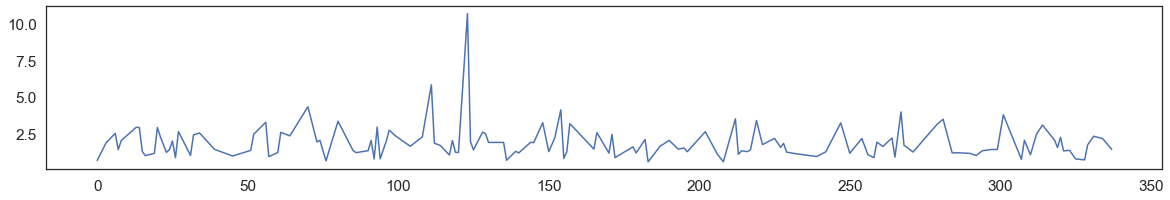

<AxesSubplot:>

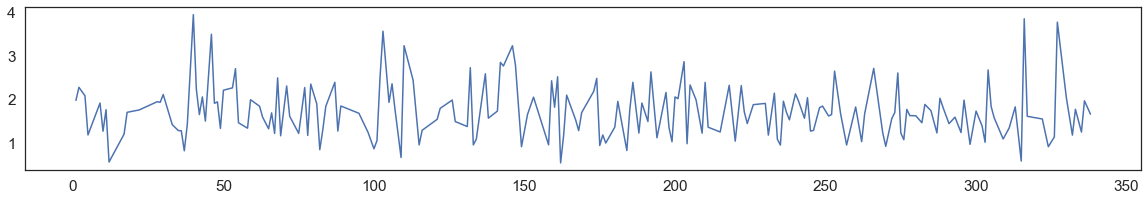

In [9]:
data[data['cluster'] == 0]['anomaly_score'].plot(figsize=(20,3)); plt.show()
data[data['cluster'] == 1]['anomaly_score'].plot(figsize=(20,3))

<Figure size 648x288 with 0 Axes>

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

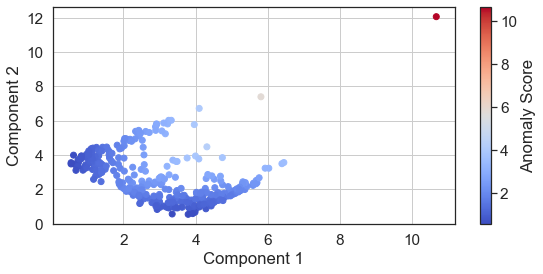

In [10]:
plt.figure( figsize = (9, 4))
plt.scatter(x=data['Comp 1'],y= data['Comp 2'], 
            c = data['anomaly_score'], 
            cmap = 'coolwarm')
plt.colorbar(label = 'Anomaly Score')
plt.xlabel('Component 1'); plt.ylabel('Component 2')
plt.grid()

### Case : 5개의 군집의 경우 이상치 분석
- Calculate distance of each point from each cluster center

In [11]:
kmeans = pipeline.make_pipeline(preprocessing.StandardScaler(), 
                                  cluster.KMeans(n_clusters = 5)).fit(X_train)

data = pd.DataFrame(kmeans.transform(X_train))
data['anomaly_score'] = data.min(axis = 1)
data['cluster'] = kmeans.predict(X_train)
data.head()

,0,1,2,3,4,anomaly_score,cluster
0,3.129498,2.496881,2.541919,4.497266,0.957666,0.957666,4
1,2.706126,0.971533,4.305072,2.939857,2.524094,0.971533,1
2,2.981488,1.637795,4.575119,3.070022,2.939131,1.637795,1
3,3.629011,3.003397,4.099539,4.758240,1.640439,1.640439,4
4,1.690804,1.368703,4.487660,3.247774,2.431914,1.368703,1


In [12]:
data['cluster'].value_counts()

4    99
3    90
1    87
0    43
2    20
Name: cluster, dtype: int64

In [13]:
data['cluster'].unique()

array([4, 1, 0, 3, 2])

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

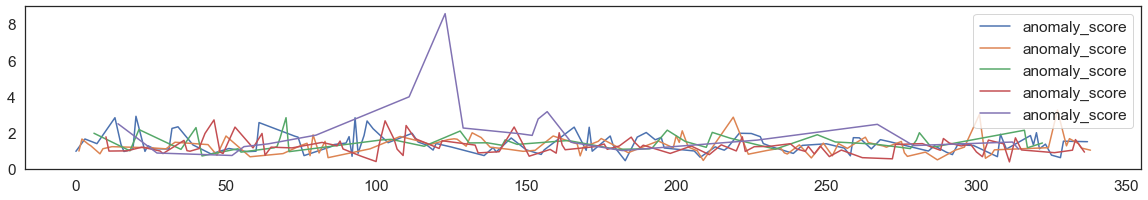

In [20]:
for i in data['cluster'].unique():
    data[data['cluster'] == i]['anomaly_score'].plot(figsize=(20,3))
    plt.legend()

- 1. Data Visualization: For data with hundreds of features, this allows us to visualize and code data on a 2D Screen. The data can be color-coded according to various quantities of interest.
- 2. For Predictive Modeling: Here, we use the transformed features as inputs to a model. This is specially useful for Linear models because the features created by K-Means are non-linear transformations — and can help account for non-linear relations in data.
- 3. Anomaly detection: The larger the distance of a point from the cluster centers, the more the more chances it has of being an anomaly.

# <font color='brown'> B. Improving performance using K-Means clusters as feature

### Fit a Linear Model

In [15]:
lgr = linear_model.LinearRegression()
score = model_selection.cross_val_score(lgr, X_train, y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')

Average r2: 0.6297518766346779


### Fit a Linear Model with StandardScaler

In [16]:
lgr = pipeline.make_pipeline(preprocessing.StandardScaler(),
                           linear_model.LinearRegression())
score = model_selection.cross_val_score(lgr, X_train, y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')

Average r2: 0.629751876634678


### K-means의 그룹 label을 입력변수로 하여 예측

In [17]:
for i in np.arange(5, 30, 5):
    lgr_km = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = i),
                           linear_model.LinearRegression())
    score = model_selection.cross_val_score(lgr_km, X_train, y_train, cv = 10, scoring = 'r2')
    print(f'KMeans 군집 {i} 개의 Average r2: {np.mean(score)}')

KMeans 군집 5 개의 Average r2: 0.5777702220902592
KMeans 군집 10 개의 Average r2: 0.6068768814810709
KMeans 군집 15 개의 Average r2: 0.7366496617854372
KMeans 군집 20 개의 Average r2: 0.7394642289022653
KMeans 군집 25 개의 Average r2: 0.7503666803283154


# <font color='brown'> Data Representation(For Input to other Algorithms)
- K-means can be used to build a “summarized” version of the data by representing it by the cluster centers. The cluster centers, in turn can be used as inputs to other algorithms.

1. K-Means detects “spherical” clusters. However, sometimes we need to detect non-convex shaped clusters which are not possible to properly detect through k-means alone. In these cases, we often use Hierarchical clustering with single linkage or other methods that are capable of detecting such clusters. However, methods like Hierarchical clustering take a long time to complete — rendering them impractical for large amounts of data. In these cases, it is possible to use first use k-means to cluster the data using a large number of clusters and using the cluster centers as input to a Hierarchical clustering algorithm(or any other clustering algorithm that can detect non-convex shaped clusters). This significantly reduces the time taken to cluster data and is also able to detect non-convex clusters.
2. K-Means cluster centers can be used as Initialization to GMMs(Gaussian Mixture Models). GMMs can be used for clustering and can be used to construct a Generative model for data.

# End